In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xesmf as xe
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import math
import os
import matplotlib.colors as colors
import scipy
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.floating_axes as FA
import mpl_toolkits.axisartist.grid_finder as GF

In [2]:
pmip={}
#Define pimp generations and model names
pmip_v4='PMIP4'
pmip_v3='PMIP3'
pmip={}
pmip['PMIP4']=['AWI-ESM-1-1-LR',
               'CESM2',
               'EC-Earth3-LR',
               'FGOALS-f3-L',
               'FGOALS-g3',
               'GISS-E2-1-G',
               'HadGEM3-GC31',
               'INM-CM4-8',
               'IPSL-CM6A-LR',
               'MIROC-ES2L',
               'MPI-ESM1-2-LR',
               'MRI-ESM2-0',
               'NESM3',
               'NorESM1-F',
               'NorESM2-LM',
               'UofT-CCSM-4']
pmip['PMIP3']=['BCC-CSM1-1',
               'CCSM4',
               'CNRM-CM5',
               'CSIRO-Mk3L-1-2',
               'CSIRO-Mk3-6-0',
               'EC-EARTH-2-2',
               'FGOALS-g2',
               'FGOALS-s2',
               'GISS-E2-R',
               'HadGEM2-CC',
               'HadGEM2-ES',
               'IPSL-CM5A-LR',
               'MIROC-ESM',
               'MPI-ESM-P',
               'MRI-CGCM3']
               
               
  




# Create the annual mean temperature change figure

Load in the necessary variables...

In [32]:
tas_ann4=xr.open_dataset('../outputs/netcdf/PMIP4_mh_diff_tas_ann_2deg.nc')
tas4_models=tas_ann4["modellist"]
ann4=tas_ann4["tas_spatialmean_ann"].mean(dim="gcms",keep_attrs=True)
std4=tas_ann4["tas_spatialmean_ann"].std(dim="gcms",keep_attrs=True)
tas_ann4.close()
tas_ann3=xr.open_dataset('../outputs/netcdf/PMIP3_mh_diff_tas_ann_2deg.nc')
tas3_models=tas_ann3["modellist"]
ann3=tas_ann3["tas_spatialmean_ann"].mean(dim="gcms",keep_attrs=True)
std3=tas_ann3["tas_spatialmean_ann"].std(dim="gcms",keep_attrs=True)
tas_ann3.close()
anndiff=ann4-ann3
ds=xr.open_dataset('../data/estimated_forcing_tempchange.nc')
forcing=ds['forced_temp_change']
ds.close()

Now make the plot

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


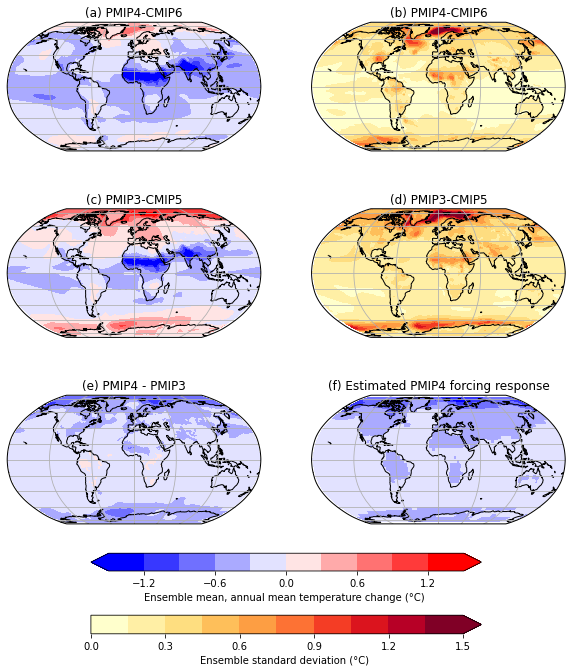

In [10]:
cmap1=plt.get_cmap('bwr')
projection = ccrs.Robinson()
transform=ccrs.PlateCarree()
clim1=[-1.5,1.5]
bounds1 = np.linspace(-1.5, 1.5, 11)
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
cmap2=plt.get_cmap('YlOrRd')
clim2=[0,1.5]
bounds2 = np.linspace(0, 1.5, 11)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(10,12),subplot_kw={'projection': ccrs.Robinson()})
ax1=axs[0][0]
ax2=axs[1][0]
ax3=axs[2][0]
ax4=axs[0][1]
ax5=axs[1][1]
ax6=axs[2][1]
ax1.set_title('(a) PMIP4-CMIP6')
ax1.coastlines()
ax1.gridlines()
fig1=ax1.imshow(ann4, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax2.set_title('(c) PMIP3-CMIP5')
ax2.coastlines()
ax2.gridlines()
fig2=ax2.imshow(ann3, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax3.set_title('(e) PMIP4 - PMIP3')
ax3.coastlines()
ax3.gridlines()
fig3=ax3.imshow(anndiff, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax4.set_title('(b) PMIP4-CMIP6')
ax4.coastlines()
ax4.gridlines()
fig4=ax4.imshow(std4, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)
ax5.set_title('(d) PMIP3-CMIP5')
ax5.coastlines()
ax5.gridlines()
fig5=ax5.imshow(std3, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)
ax6.set_title('(f) Estimated PMIP4 forcing response')
ax6.coastlines()
ax6.gridlines()
fig6=ax6.imshow(forcing, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)

cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in axs.flat],location='bottom',pad=0.05,shrink=0.7,fraction=0.05)
cb2=plt.colorbar(fig4, cax=cax2, **kw2,extend='max')
cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in axs.flat],location='bottom',pad=0.05,shrink=0.7,fraction=0.05)
cb1=plt.colorbar(fig3, cax=cax1, **kw1,extend='both')

cb1label='Ensemble mean, annual mean temperature change (%sC) ' %chr(176)
cb2label='Ensemble standard deviation (%sC) ' %chr(176)
cb1.set_label(cb1label)
cb2.set_label(cb2label)
plt.savefig('../plots/pdf/tas_ann.pdf')
plt.savefig('../plots/png/tas_ann.png')

# The seasonal changes in temperature

In [11]:
tas_djf4=xr.open_dataset('../outputs/netcdf/PMIP4_mh_diff_tas_djf_2deg.nc')
djf4=tas_djf4["tas_spatialmean_djf"].mean(dim="gcms",keep_attrs=True)
djfstd4=tas_djf4["tas_spatialmean_djf"].std(dim="gcms",keep_attrs=True)
tas_djf4.close()
tas_djf3=xr.open_dataset('../outputs/netcdf/PMIP3_mh_diff_tas_djf_2deg.nc')
djf3=tas_djf3["tas_spatialmean_djf"].mean(dim="gcms",keep_attrs=True)
djfstd3=tas_djf3["tas_spatialmean_djf"].std(dim="gcms",keep_attrs=True)
tas_djf3.close()
djfdiff=djf4-djf3
tas_jja4=xr.open_dataset('../outputs/netcdf/PMIP4_mh_diff_tas_jja_2deg.nc')
jja4=tas_jja4["tas_spatialmean_jja"].mean(dim="gcms",keep_attrs=True)
jjastd4=tas_jja4["tas_spatialmean_jja"].std(dim="gcms",keep_attrs=True)
tas_jja4.close()
tas_jja3=xr.open_dataset('../outputs/netcdf/PMIP3_mh_diff_tas_jja_2deg.nc')
jja3=tas_jja3["tas_spatialmean_jja"].mean(dim="gcms",keep_attrs=True)
jjastd3=tas_jja3["tas_spatialmean_jja"].std(dim="gcms",keep_attrs=True)
tas_jja3.close()
jjadiff=jja4-jja3

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


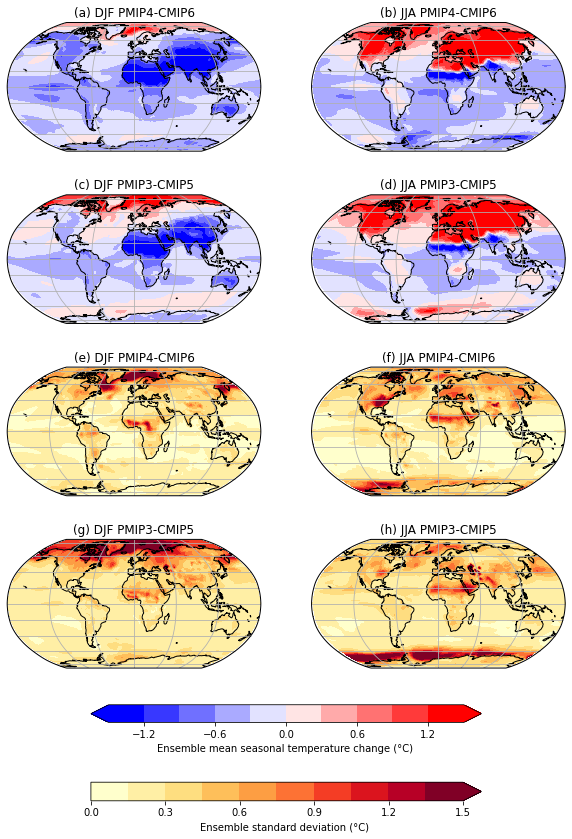

In [12]:
cmap1=plt.get_cmap('bwr')
projection = ccrs.Robinson()
transform=ccrs.PlateCarree()
clim1=[-1.5,1.5]
bounds1 = np.linspace(-1.5, 1.5, 11)
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
cmap2=plt.get_cmap('YlOrRd')
clim2=[0,1.5]
bounds2 = np.linspace(0, 1.5, 11)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(10,15),subplot_kw={'projection': ccrs.Robinson()})
ax1=axs[0][0]
ax2=axs[1][0]

ax4=axs[2][0]
ax5=axs[3][0]
ax6=axs[0][1]
ax7=axs[1][1]

ax9=axs[2][1]
ax10=axs[3][1]
ax1.set_title('(a) DJF PMIP4-CMIP6')
ax1.coastlines()
ax1.gridlines()
fig1=ax1.imshow(djf4, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax2.set_title('(c) DJF PMIP3-CMIP5')
ax2.coastlines()
ax2.gridlines()
fig2=ax2.imshow(djf3, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)

ax4.set_title('(e) DJF PMIP4-CMIP6')
ax4.coastlines()
ax4.gridlines()
fig4=ax4.imshow(djfstd4, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)
ax5.set_title('(g) DJF PMIP3-CMIP5')
ax5.coastlines()
ax5.gridlines()
fig5=ax5.imshow(djfstd3, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)
ax6.set_title('(b) JJA PMIP4-CMIP6')
ax6.coastlines()
ax6.gridlines()
fig6=ax6.imshow(jja4, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax7.set_title('(d) JJA PMIP3-CMIP5')
ax7.coastlines()
ax7.gridlines()
fig7=ax7.imshow(jja3, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)

ax9.set_title('(f) JJA PMIP4-CMIP6')
ax9.coastlines()
ax9.gridlines()
fig9=ax9.imshow(jjastd4, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)
ax10.set_title('(h) JJA PMIP3-CMIP5')
ax10.coastlines()
ax10.gridlines()
fig10=ax10.imshow(jjastd3, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)

cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in axs.flat],location='bottom',pad=0.05,shrink=0.7,fraction=0.05)
cb2=plt.colorbar(fig4, cax=cax2, **kw2,extend='max')
cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in axs.flat],location='bottom',pad=0.05,shrink=0.7,fraction=0.05)
cb1=plt.colorbar(fig3, cax=cax1, **kw1,extend='both')

cb1label='Ensemble mean seasonal temperature change (%sC) ' %chr(176)
cb2label='Ensemble standard deviation (%sC) ' %chr(176)
cb1.set_label(cb1label)
cb2.set_label(cb2label)
plt.savefig('../plots/pdf/tas_seasonal.pdf')
plt.savefig('../plots/png/tas_seasonal.png')

# The seasonal changes in precipitation

In [31]:
pr_djf4=xr.open_dataset('../outputs/netcdf/PMIP4_mh_diff_pr_djf_2deg.nc')
pr4_models=pr_djf4["modellist"]
djf4=pr_djf4["pr_spatialmean_djf"].mean(dim="gcms",keep_attrs=True)
djfstd4=pr_djf4["pr_spatialmean_djf"].std(dim="gcms",keep_attrs=True)
pr_djf4.close()
pr_djf3=xr.open_dataset('../outputs/netcdf/PMIP3_mh_diff_pr_djf_2deg.nc')
pr3_models=pr_djf3["modellist"]
djf3=pr_djf3["pr_spatialmean_djf"].mean(dim="gcms",keep_attrs=True)
djfstd3=pr_djf3["pr_spatialmean_djf"].std(dim="gcms",keep_attrs=True)
pr_djf3.close()
djfdiff=djf4-djf3
pr_jja4=xr.open_dataset('../outputs/netcdf/PMIP4_mh_diff_pr_jja_2deg.nc')
jja4=pr_jja4["pr_spatialmean_jja"].mean(dim="gcms",keep_attrs=True)
jjastd4=pr_jja4["pr_spatialmean_jja"].std(dim="gcms",keep_attrs=True)
pr_jja4.close()
pr_jja3=xr.open_dataset('../outputs/netcdf/PMIP3_mh_diff_pr_jja_2deg.nc')
jja3=pr_jja3["pr_spatialmean_jja"].mean(dim="gcms",keep_attrs=True)
jjastd3=pr_jja3["pr_spatialmean_jja"].std(dim="gcms",keep_attrs=True)
pr_jja3.close()
jjadiff=jja4-jja3

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


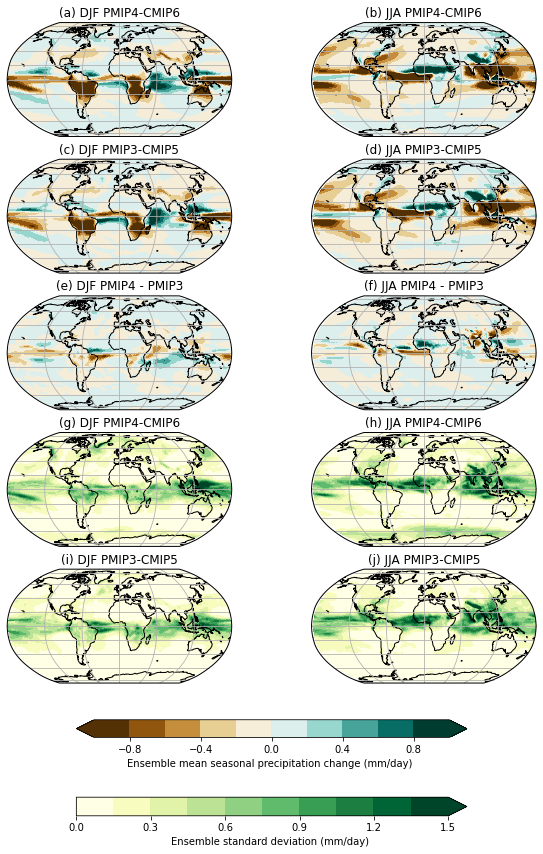

In [14]:
cmap1=plt.get_cmap('BrBG')
projection = ccrs.Robinson()
transform=ccrs.PlateCarree()
clim1=[-1,1]
bounds1 = np.linspace(-1, 1, 11)
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
cmap2=plt.get_cmap('YlGn')
clim2=[0,1.5]
bounds2 = np.linspace(0, 1.5, 11)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
fig, axs = plt.subplots(nrows=5,ncols=2,figsize=(10,15),subplot_kw={'projection': ccrs.Robinson()})
ax1=axs[0][0]
ax2=axs[1][0]
ax3=axs[2][0]
ax4=axs[3][0]
ax5=axs[4][0]
ax6=axs[0][1]
ax7=axs[1][1]
ax8=axs[2][1]
ax9=axs[3][1]
ax10=axs[4][1]
ax1.set_title('(a) DJF PMIP4-CMIP6')
ax1.coastlines()
ax1.gridlines()
fig1=ax1.imshow(djf4, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax2.set_title('(c) DJF PMIP3-CMIP5')
ax2.coastlines()
ax2.gridlines()
fig2=ax2.imshow(djf3, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax3.set_title('(e) DJF PMIP4 - PMIP3')
ax3.coastlines()
ax3.gridlines()
fig3=ax3.imshow(djfdiff, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax4.set_title('(g) DJF PMIP4-CMIP6')
ax4.coastlines()
ax4.gridlines()
fig4=ax4.imshow(djfstd4, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)
ax5.set_title('(i) DJF PMIP3-CMIP5')
ax5.coastlines()
ax5.gridlines()
fig5=ax5.imshow(djfstd3, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)
ax6.set_title('(b) JJA PMIP4-CMIP6')
ax6.coastlines()
ax6.gridlines()
fig6=ax6.imshow(jja4, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax7.set_title('(d) JJA PMIP3-CMIP5')
ax7.coastlines()
ax7.gridlines()
fig7=ax7.imshow(jja3, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax8.set_title('(f) JJA PMIP4 - PMIP3')
ax8.coastlines()
ax8.gridlines()
fig8=ax8.imshow(jjadiff, transform=transform,cmap=cmap1,clim=clim1,norm=norm1)
ax9.set_title('(h) JJA PMIP4-CMIP6')
ax9.coastlines()
ax9.gridlines()
fig9=ax9.imshow(jjastd4, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)
ax10.set_title('(j) JJA PMIP3-CMIP5')
ax10.coastlines()
ax10.gridlines()
fig10=ax10.imshow(jjastd3, transform=transform,cmap=cmap2,clim=clim2,norm=norm2)

cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in axs.flat],location='bottom',pad=0.05,shrink=0.7,fraction=0.05)
cb2=plt.colorbar(fig4, cax=cax2, **kw2,extend='max')
cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in axs.flat],location='bottom',pad=0.05,shrink=0.7,fraction=0.05)
cb1=plt.colorbar(fig3, cax=cax1, **kw1,extend='both')

cb1label='Ensemble mean seasonal precipitation change (mm/day) '
cb2label='Ensemble standard deviation (mm/day) '
cb1.set_label(cb1label)
cb2.set_label(cb2label)
plt.savefig('../plots/pdf/pr_seasonal.pdf')
plt.savefig('../plots/png/pr_seasonal.png')

# Investigate the individual monsoons

In [15]:
def imonsoon(p,v):
    filename='../outputs/csv/%s_%s.csv'%(p,v)
    var=pd.read_csv(filename,skipinitialspace=True,header=0)
    return var

df4pav= imonsoon('PMIP4','pav')
df4psd= imonsoon('PMIP4','psd')
df4aav= imonsoon('PMIP4','aav')
df4asd= imonsoon('PMIP4','asd')
df4water= imonsoon('PMIP4','totwater')

df3pav= imonsoon('PMIP3','pav')
df3psd= imonsoon('PMIP3','psd')
df3aav= imonsoon('PMIP3','aav')
df3asd= imonsoon('PMIP3','asd')
df3water= imonsoon('PMIP3','totwater')


In [16]:

model_list4=pd.read_csv('PMIP4_modellist.csv',skipinitialspace=True,header=0)['model']
model_list3=pd.read_csv('PMIP3_modellist.csv',skipinitialspace=True,header=0)['model']
               

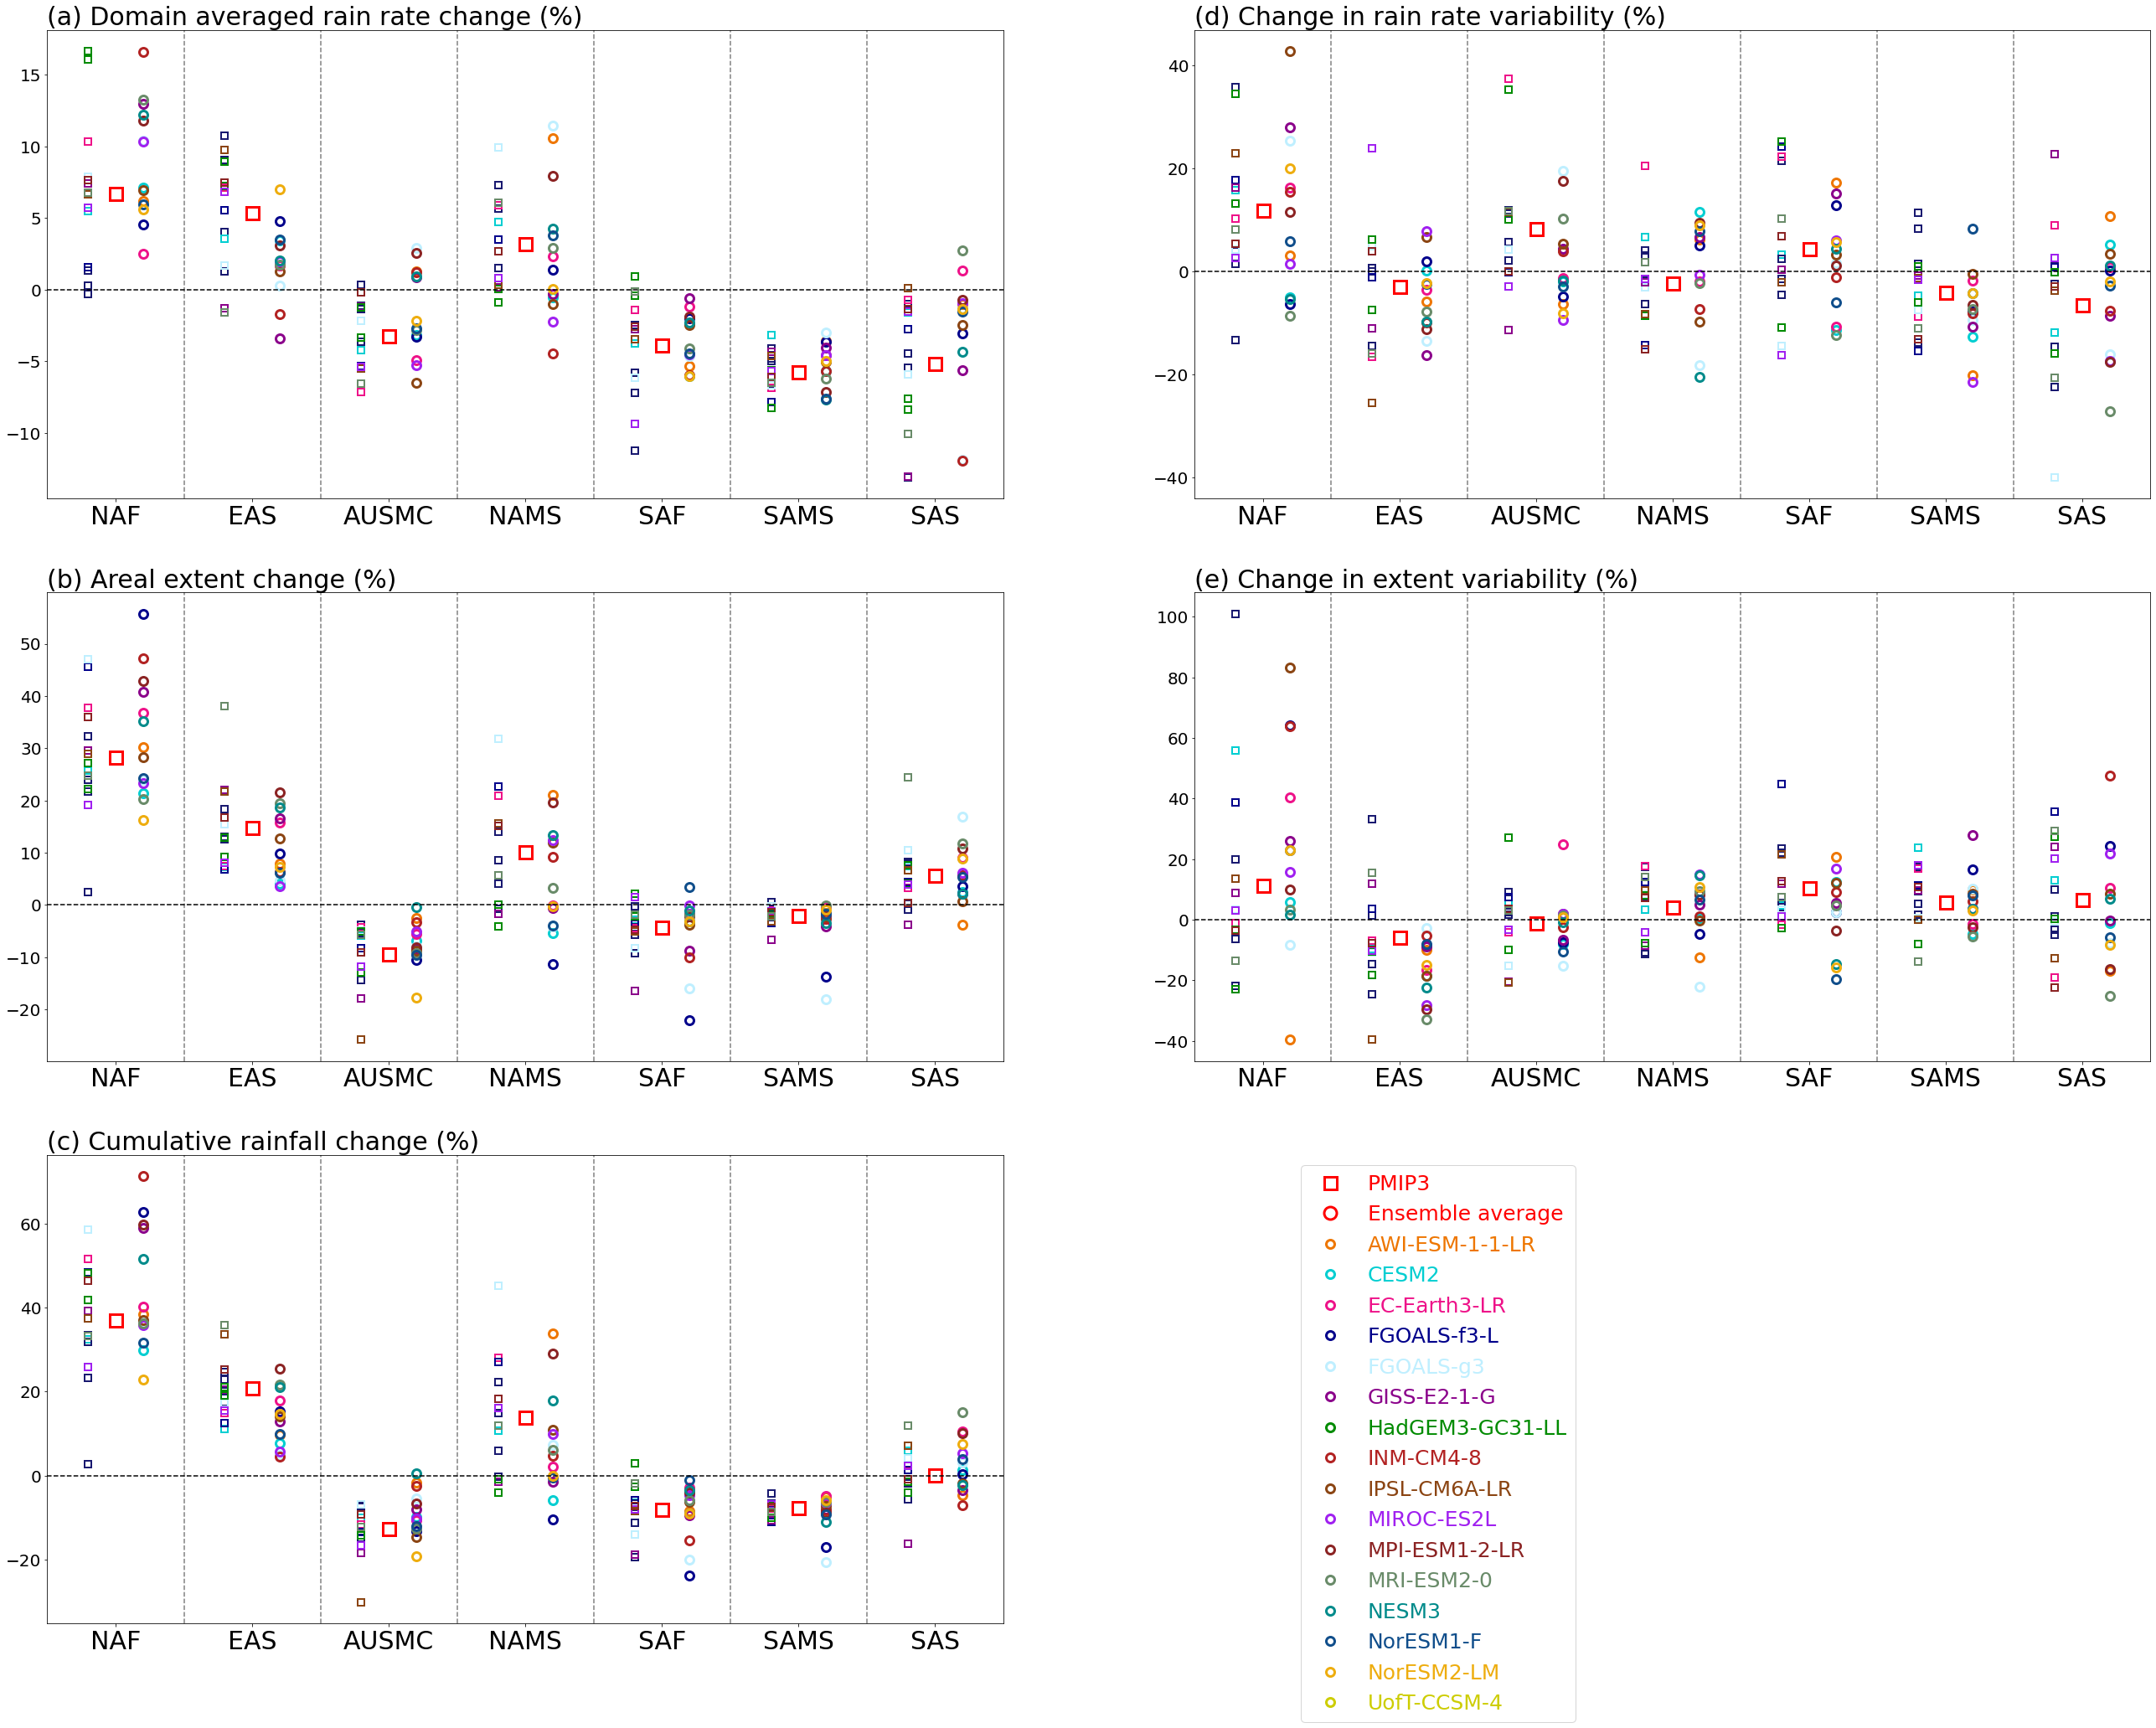

In [18]:
p1=[0.3,1.3,2.3,3.3,4.3,5.3,6.3]
p2=[0.7,1.7,2.7,3.7,4.7,5.7,6.7]
p3=[0.5,1.5,2.5,3.5,4.5,5.5,6.5]
lines=[1,2,3,4,5,6]
monsoonlist=['NAF','EAS','AUSMC','NAMS','SAF','SAMS','SAS',]
var=monsoonlist
color_r3=pd.read_csv('PMIP3_modellist.csv',skipinitialspace=True,header=0)['r']
color_g3=pd.read_csv('PMIP3_modellist.csv',skipinitialspace=True,header=0)['g']
color_b3=pd.read_csv('PMIP3_modellist.csv',skipinitialspace=True,header=0)['b']
color_r4=pd.read_csv('PMIP4_modellist.csv',skipinitialspace=True,header=0)['mh_r']
color_g4=pd.read_csv('PMIP4_modellist.csv',skipinitialspace=True,header=0)['mh_g']
color_b4=pd.read_csv('PMIP4_modellist.csv',skipinitialspace=True,header=0)['mh_b']


plt.figure(figsize=(45,35))
#pav
plt.subplot(321)
plt.title('(a) Domain averaged rain rate change (%)',loc='left',fontsize=30)
plt.xlim((0,7))
plt.plot(p3,df3pav['average'],marker='s', color='r',mew=3,ms=15,linestyle='None',fillstyle='none')
for i in range(len(model_list3)):
    plt.plot(p1,df3pav[model_list3[i]],marker='s', color=(color_r3[i],color_g3[i],color_b3[i]),fillstyle='none',mew=2, ms=8,linestyle='None')
plt.plot(p3,df4pav['average'],marker='o',color='r',mew=3,ms=15,linestyle='None',fillstyle='none')
for i in range(len(model_list4)):
    plt.plot(p2,df4pav[model_list4[i]],marker='o',color=(color_r4[i],color_g4[i],color_b4[i]),fillstyle='none',mew=3, ms=10,linestyle='None',label=model_list4[i])
plt.tick_params(labelsize=20)
plt.xticks(p3,var,fontsize=30)

for i in lines:
    plt.axvline(x=i,color='grey',linestyle="--",linewidth=1.5)
plt.axhline(y=0,color='k',linestyle="--")


plt.subplot(322)
plt.title('(d) Change in rain rate variability (%)',loc='left',fontsize=30)
plt.xlim((0,7))
plt.plot(p3,df3psd['average'],marker='s', color='r',mew=3,ms=15,linestyle='None',fillstyle='none')
for i in range(len(model_list3)):
    plt.plot(p1,df3psd[model_list3[i]],marker='s', color=(color_r3[i],color_g3[i],color_b3[i]),fillstyle='none',mew=2, ms=8,linestyle='None')
plt.plot(p3,df4psd['average'],marker='o',color='r',mew=3,ms=15,linestyle='None',fillstyle='none')
for i in range(len(model_list4)):
    plt.plot(p2,df4psd[model_list4[i]],marker='o',color=(color_r4[i],color_g4[i],color_b4[i]),fillstyle='none',mew=3, ms=10,linestyle='None',label=model_list4[i])
plt.tick_params(labelsize=20)
plt.xticks(p3,var,fontsize=30)

for i in lines:
    plt.axvline(x=i,color='grey',linestyle="--",linewidth=1.5)
plt.axhline(y=0,color='k',linestyle="--")

plt.subplot(323)
plt.title('(b) Areal extent change (%)',loc='left',fontsize=30)
plt.xlim((0,7))
plt.plot(p3,df3aav['average'],marker='s', color='r',mew=3,ms=15,linestyle='None',fillstyle='none')
for i in range(len(model_list3)):
    plt.plot(p1,df3aav[model_list3[i]],marker='s', color=(color_r3[i],color_g3[i],color_b3[i]),fillstyle='none',mew=2, ms=8,linestyle='None')
plt.plot(p3,df4aav['average'],marker='o',color='r',mew=3,ms=15,linestyle='None',fillstyle='none')
for i in range(len(model_list4)):
    plt.plot(p2,df4aav[model_list4[i]],marker='o',color=(color_r4[i],color_g4[i],color_b4[i]),fillstyle='none',mew=3, ms=10,linestyle='None',label=model_list4[i])
plt.tick_params(labelsize=20)
plt.xticks(p3,var,fontsize=30)
for i in lines:
    plt.axvline(x=i,color='grey',linestyle="--",linewidth=1.5)
plt.axhline(y=0,color='k',linestyle="--")


plt.subplot(324)
plt.title('(e) Change in extent variability (%)',loc='left',fontsize=30)
plt.xlim((0,7))
plt.plot(p3,df3asd['average'],marker='s', color='r',mew=3,ms=15,linestyle='None',fillstyle='none')
for i in range(len(model_list3)):
    plt.plot(p1,df3asd[model_list3[i]],marker='s', color=(color_r3[i],color_g3[i],color_b3[i]),fillstyle='none',mew=2, ms=8,linestyle='None')
plt.plot(p3,df4asd['average'],marker='o',color='r',mew=3,ms=15,linestyle='None',fillstyle='none')
for i in range(len(model_list4)):
    plt.plot(p2,df4asd[model_list4[i]],marker='o',color=(color_r4[i],color_g4[i],color_b4[i]),fillstyle='none',mew=3, ms=10,linestyle='None',label=model_list4[i])
plt.tick_params(labelsize=20)
plt.xticks(p3,var,fontsize=30)
for i in lines:
    plt.axvline(x=i,color='grey',linestyle="--",linewidth=1.5)
plt.axhline(y=0,color='k',linestyle="--")

plt.subplot(325)
plt.title('(c) Cumulative rainfall change (%)',loc='left',fontsize=30)
plt.xlim((0,7))
plt.plot(p3,df3water['average'],marker='s', color='r',mew=3,ms=15,linestyle='None',fillstyle='none',label='PMIP3')
for i in range(len(model_list3)):
    plt.plot(p1,df3water[model_list3[i]],marker='s', color=(color_r3[i],color_g3[i],color_b3[i]),fillstyle='none',mew=2, ms=8,linestyle='None')
plt.plot(p3,df4water['average'],marker='o',color='r',mew=3,ms=15,linestyle='None',fillstyle='none',label='Ensemble average')
for i in range(len(model_list4)):
    plt.plot(p2,df4water[model_list4[i]],marker='o',color=(color_r4[i],color_g4[i],color_b4[i]),fillstyle='none',mew=3, ms=10,linestyle='None',label=model_list4[i])
plt.tick_params(labelsize=20)
plt.xticks(p3,var,fontsize=30)
for i in lines:
    plt.axvline(x=i,color='grey',linestyle="--",linewidth=1.5)
plt.axhline(y=0,color='k',linestyle="--")
leg=plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', borderaxespad=0.5,fontsize=25)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())

plt.savefig('../plots/pdf/mh_individual_monsoon.pdf')
plt.savefig('../plots/png/mh_individual_monsoon.png')


# Plot temperatures in a 30° latitudinal bands

In [19]:
modellist4=pd.read_csv('PMIP4_modellist.csv',skipinitialspace=True,header=0)['model']
modellist3=pd.read_csv('PMIP3_modellist.csv',skipinitialspace=True,header=0)['model']
data4_pi = pd.read_csv('../outputs/csv/PMIP4_piControl_zonal_tas_ann.csv',skipinitialspace=True,header=0)
data4=pd.read_csv('../outputs/csv/PMIP4_mh_diff_zonal_tas_ann.csv',skipinitialspace=True,header=0)
data3_pi = pd.read_csv('../outputs/csv/PMIP3_piControl_zonal_tas_ann.csv',skipinitialspace=True,header=0)
data3=pd.read_csv('../outputs/csv/PMIP3_mh_diff_zonal_tas_ann.csv',skipinitialspace=True,header=0)

In [20]:
#zonal obs data
obs_zonal=[-18.2817,10.0814,23.6106,24.7649,8.90803,-10.6966]
yerr_obs=[0.412207,0.100066,0.112806,0.127979,0.120554,0.300003]

#temp12k
ryerr5=[-2.02,-0.03,-0.12,-0.23,0.21,0.44]
ryerr95=[1.47,1.66,0.82,1.13,3.28,4.09]
recons_zonal=[0.03,0.63,0.23,0.23,0.81,1.03]

In [21]:
yerr5=[]
yerr95=[]
for i in range(6):
    yerr5.append(recons_zonal[i]-ryerr5[i])
    yerr95.append(ryerr95[i]-recons_zonal[i])

In [42]:
data3_pi.values[0,0]

0.0

In [23]:
error=[yerr5,yerr95]

In [25]:
recons_filename='../recons/Bartlein/mat_delta_06ka_ALL_grid_2x2.nc'
d=xr.open_dataset(recons_filename)
mat_recons=d['mat_anm_mean']
xnan=np.ma.filled(mat_recons.astype(float), np.nan)
xla1=['-90-60','-60-30','-300','030','3060','6090']
x1=np.arange(0,91,15)
RECONS={}
recons_data=[]
for i in range(len(x1)-1):
    re=[]
    c=xnan[x1[i]:x1[i+1]]    
    for row in range(15):
        for col in range(180):
            val=str(c[row][col])
            if val != 'nan':
                re.append(val)
    RECONS[xla1[i]]=np.array(re).astype(float)
    recons_data.append(RECONS[xla1[i]])

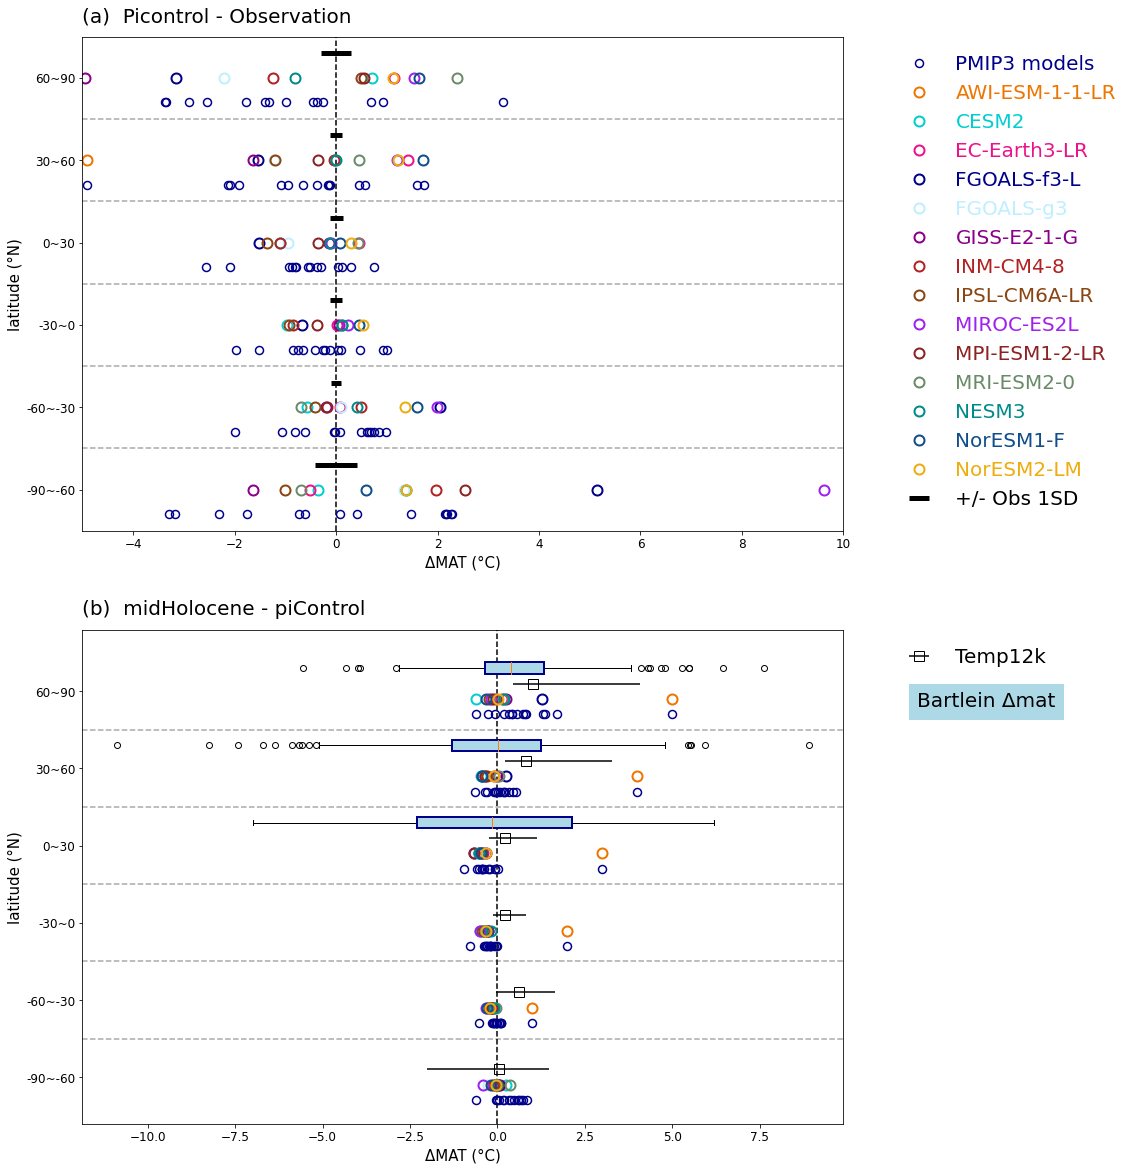

In [46]:
xla=['-90~-60','-60~-30','-30~0','0~30','30~60','60~90']
color_r3=pd.read_csv('PMIP3_modellist.csv',skipinitialspace=True,header=0)['r']
color_g3=pd.read_csv('PMIP3_modellist.csv',skipinitialspace=True,header=0)['g']
color_b3=pd.read_csv('PMIP3_modellist.csv',skipinitialspace=True,header=0)['b']
color_r4=pd.read_csv('PMIP4_modellist.csv',skipinitialspace=True,header=0)['mh_r']
color_g4=pd.read_csv('PMIP4_modellist.csv',skipinitialspace=True,header=0)['mh_g']
color_b4=pd.read_csv('PMIP4_modellist.csv',skipinitialspace=True,header=0)['mh_b']


p0=[0,0,0,0,0,0]
p1=[1.1,2.1,3.1,4.1,5.1,6.1]
p2=[0.9,1.9,2.9,3.9,4.9,5.9]
p3=[1,2,3,4,5,6]
p4=[0.7,1.7,2.7,3.7,4.7,5.7]
p5=[1.3,2.3,3.3,4.3,5.3,6.3]
p6=[1.5,2.5,3.5,4.5,5.5]
plt.figure(figsize=(30,20))
plt.subplot(221)
plt.ylim((0.5,6.5))
plt.xlim((-5,10))
for i in range(len(p6)):
    plt.axhline(y=p6[i],color='darkgrey',linestyle="--")
plt.title('(a)  Picontrol - Observation',pad=15,fontsize=20,loc='left')
plt.axvline(x=0,color='k',linestyle="--")
plt.errorbar(p0, p5, xerr=yerr_obs,uplims=True,lolims=True,color='k',lw=5,ls='none',label='+/- Obs 1SD')
plt.plot(data3_pi.values[0,0]-obs_zonal,p4,color='darkblue',marker='o',mew=1.5, ms=8,fillstyle='none',linestyle='None',label='PMIP3 models')
#plt.errorbar(obs_zonal, p5, xerr=yerr_obs,marker='s',ms=10,color='k',ls='none',label='Obs')
for i,m in enumerate(modellist4):
    if m in tas4_models.values:
        plt.plot(data4_pi.values[:,i]-obs_zonal,p3,color=(color_r4[i],color_g4[i],color_b4[i]),marker='o',mew=2, ms=10,label=m,fillstyle='none',linestyle='None')
for i,m in enumerate(modellist3):
    if m in tas3_models.values:
        plt.plot(data3_pi.values[:,i]-obs_zonal,p4,color='darkblue',marker='o',mew=1.5, ms=8,fillstyle='none',linestyle='None')
yylabel='latitude (%sN)' %(chr(176))
xxlabel='%sMAT (%sC)' %(chr(916),chr(176))
plt.ylabel(yylabel,fontsize=15)
plt.xlabel(xxlabel,fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(p3,xla,fontsize=12)
leg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',edgecolor='None',facecolor='None', borderaxespad=0.5,fontsize=20)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
    
plt.subplot(223)
for i in range(len(p6)):
    plt.axhline(y=p6[i],color='darkgrey',linestyle="--")
plt.title('(b)  midHolocene - piControl',pad=15,fontsize=20,loc='left')
plt.axvline(x=0,color='k',linestyle="--")

for i,m in enumerate(modellist4):
    if m in tas4_models.values:
        plt.plot(data4.values[:,i],p2,color=(color_r4[i],color_g4[i],color_b4[i]),marker='o',mew=2, ms=10,fillstyle='none',linestyle='None')
for i,m in enumerate(modellist3):
    if m in tas3_models.values:
        plt.plot(data3.values[:,i],p4,color='darkblue',marker='o',mew=1.5, ms=8,fillstyle='none',linestyle='None')
#plt.plot(recons_zonal, p1, marker='o',color='k',mew=2,ms=10,fillstyle='none',ls='none',label='Temp12k')
plt.errorbar(recons_zonal, p1, xerr=error,marker='s',color='k',ms=10,fillstyle='none',ls='none',label='Temp12k')
#plt.errorbar(recons_zonal, p1, xerr=yerr95,lolims=True,marker='s',color='k',ms=10,fillstyle='none',ls='none')
#for i in range(6):
#    plt.plot([yerr5[i],yerr95[i]],[p1[i],p1[i]],'k')
bp=plt.boxplot(recons_data[3:6],positions=p5[3:6],vert=False,widths=0.15,patch_artist=True)
for box in bp['boxes']:
    box.set(color='darkblue', linewidth=2)
    box.set(facecolor = 'lightblue' )
yylabel='latitude (%sN)' %(chr(176))
xxlabel='%sMAT (%sC)' %(chr(916),chr(176))
plt.ylabel(yylabel,fontsize=15)
plt.xlabel(xxlabel,fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(p3,xla,fontsize=12)
leg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',edgecolor='None',facecolor='None', borderaxespad=0.5,fontsize=20)
plt.text(12, 5.8, 'Bartlein %smat'%(chr(916)),backgroundcolor='lightblue', color='black', weight='roman',fontsize=20)

plt.savefig('../plots/pdf/zonal_temp_option1.pdf')
plt.savefig('../plots/png/zonal_temp_option1.png')


# Taylor Diagram in Supplement
## Bartlein:dMAT,dMAP,dmtwa-dmtco
## Temp12k: dMAT, dsummer-dwinter

In [3]:
# copied from https://gist.github.com/ycopin/3342888
#A few changes have been made
class TaylorDiagram(object):
    """
    Taylor diagram.

    Plot model standard deviation and correlation to reference (data)
    sample in a single-quadrant polar plot, with r=stddev and
    theta=arccos(correlation).
    """

    def __init__(self, refstd,
                 fig=None, rect=111, label='_', srange=(0, 1.1), extend=False):
        """
        Set up Taylor diagram axes, i.e. single quadrant polar
        plot, using `mpl_toolkits.axisartist.floating_axes`.

        Parameters:

        * refstd: reference standard deviation to be compared to
        * fig: input Figure or None
        * rect: subplot definition
        * label: reference label
        * srange: stddev axis extension, in units of *refstd*
        * extend: extend diagram to negative correlations
        """

        self.refstd = refstd            # Reference standard deviation

        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = np.array([0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99, 1])
        if extend:
            # Diagram extended to negative correlations
            self.tmax = np.pi
            rlocs = np.concatenate((-rlocs[:0:-1], rlocs))
        else:
            # Diagram limited to positive correlations
            self.tmax = np.pi/2
        tlocs = np.arccos(rlocs)        # Conversion to polar angles
        gl1 = GF.FixedLocator(tlocs)    # Positions
        tf1 = GF.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        # Standard deviation axis extent (in units of reference stddev)
        self.smin = srange[0] * self.refstd
        self.smax = srange[1] * self.refstd

        ghelper = FA.GridHelperCurveLinear(
            tr,
            extremes=(0, self.tmax, self.smin, self.smax),
            grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure()

        ax = FA.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")   # "Angle axis"
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")

        ax.axis["left"].set_axis_direction("bottom")  # "X axis"
        #ax.axis["left"].label.set_text("Standard deviation")

        ax.axis["right"].set_axis_direction("top")    # "Y-axis"
        ax.axis["right"].toggle(ticklabels=True)
        ax.axis["right"].major_ticklabels.set_axis_direction(
            "bottom" if extend else "left")

        if self.smin:
            ax.axis["bottom"].toggle(ticklabels=False, label=False)
        else:
            ax.axis["bottom"].set_visible(False)          # Unused

        self._ax = ax                   # Graphical axes
        self.ax = ax.get_aux_axes(tr)   # Polar coordinates

        # Add reference point and stddev contour
        l, = self.ax.plot([0], self.refstd, color='g',marker='s',mec='k',mew=2,
                          ls='', ms=10, label=label)
        t = np.linspace(0, self.tmax)
        r = np.zeros_like(t) + self.refstd
        self.ax.plot(t, r, 'g',lw=2, label='_')

        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        """
        Add sample (*stddev*, *corrcoeff*) to the Taylor
        diagram. *args* and *kwargs* are directly propagated to the
        `Figure.plot` command.
        """

        l, = self.ax.plot(np.arccos(corrcoef), stddev,
                          *args, **kwargs)  # (theta, radius)
        self.samplePoints.append(l)

        return l

    def add_grid(self, *args, **kwargs):
        """Add a grid."""

        self._ax.grid(*args, **kwargs)

    def add_contours(self, levels=5, **kwargs):
        """
        Add constant centered RMS difference contours, defined by *levels*.
        """

        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax),
                             np.linspace(0, self.tmax))
        # Compute centered RMS difference
        rms = np.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*np.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)

        return contours






In [4]:
def TD_plot(data1,data2,data3,data4,data5,data6,data7,data8,data9,data10):
    """
    Climatology-oriented example (after iteration w/ Michael A. Rawlins).
    """

    # Reference std
    stdref = 1

    # Samples std,rho,name
    samples1 = data1
    samples2 = data2
    samples3 = data3
    samples4 = data4
    samples5 = data5
    samples6 = data6
    samples7 = data7
    samples8 = data8
    samples9 = data9
    samples10 = data10
    
    
    fig = plt.figure(figsize=(20,14))

    dia = TaylorDiagram(stdref, fig=fig, extend=True)
    #dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

    # Add models to Taylor diagram
    for i, (stddev, corrcoef, name) in enumerate(samples1):
        dia.add_sample(stddev, corrcoef,
                       marker='o', mec='darkred',fillstyle='none',mew=1.5, ms=10, label=name)

    for i, (stddev, corrcoef, name) in enumerate(samples2):
        dia.add_sample(stddev, corrcoef,
                       marker='o',mec='salmon', fillstyle='none',mew=1.5, ms=10, label=name)
    
    for i, (stddev, corrcoef, name) in enumerate(samples3):
        dia.add_sample(stddev, corrcoef,
                       marker='P', mec='darkblue',fillstyle='none',mew=1.5, ms=10, label=name)

    for i, (stddev, corrcoef, name) in enumerate(samples4):
        dia.add_sample(stddev, corrcoef,
                       marker='P',mec='lightblue', fillstyle='none',mew=1.5, ms=10, label=name)
    
    for i, (stddev, corrcoef, name) in enumerate(samples5):
        dia.add_sample(stddev, corrcoef,
                       marker='d', mec='darkgreen',fillstyle='none',mew=1.5, ms=10, label=name)

    for i, (stddev, corrcoef, name) in enumerate(samples6):
        dia.add_sample(stddev, corrcoef,
                       marker='d',mec='lightgreen', fillstyle='none',mew=1.5, ms=10, label=name)

    for i, (stddev, corrcoef, name) in enumerate(samples7):
        dia.add_sample(stddev, corrcoef,
                       marker='X', mec='darkviolet',fillstyle='none',mew=1.5, ms=10, label=name)

    for i, (stddev, corrcoef, name) in enumerate(samples8):
        dia.add_sample(stddev, corrcoef,
                   marker='X',mec='thistle', fillstyle='none',mew=1.5, ms=10, label=name)
    
    for i, (stddev, corrcoef, name) in enumerate(samples9):
        dia.add_sample(stddev, corrcoef,
                   marker='s', mec='darkorange',fillstyle='none',mew=1.5, ms=10, label=name)

    for i, (stddev, corrcoef, name) in enumerate(samples10):
        dia.add_sample(stddev, corrcoef,
                       marker='s',mec='moccasin', fillstyle='none',mew=1.5, ms=10, label=name)
    
    
    
    

    # Add RMS contours, and label them
    contours = dia.add_contours(levels=15, colors='g',linewidths=0.5,linestyles='dashdot')  # 5 levels in grey
    plt.clabel(contours, inline=1, fontsize=10, fmt='%.1f')

    dia.add_grid(ls=(0, (1, 10)),color='b',lw=0.5,label='Standard Deviation')                                  # Add grid
    dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward
    plt.axvline(x=0,color='k',lw=1.5)
   
    # Add a figure legend and title
   # fig.legend(dia.samplePoints,
    #           [ p.get_label() for p in dia.samplePoints ],
    #           numpoints=1, prop=dict(size='small'), loc='upper right')
    #fig.suptitle("Taylor diagram", size='x-large')  # Figure title
    #plt.xlabel('Standard Deviation')
    

In [5]:
def data_TD(filename):
    DATA= pd.read_csv(filename,skipinitialspace=True,header=0,usecols=['model_name','ssdd','corr']) 
    data=[]
    for i in range(len(DATA['model_name'])):
        model=DATA['model_name'][i]
        std=DATA['ssdd'][i]
        rho=DATA['corr'][i]
        data.append([std,rho,model])
    return data




In [6]:

s_w3=data_TD('../outputs/csv/TD/temp12k_PMIP3_s-w_data.csv')
s_w4=data_TD('../outputs/csv/TD/temp12k_PMIP4_s-w_data.csv')
ann3=data_TD('../outputs/csv/TD/temp12k_PMIP3_annual_data.csv')
ann4=data_TD('../outputs/csv/TD/temp12k_PMIP4_annual_data.csv')
mat3=data_TD('../outputs/csv/TD/bartlein_PMIP3_mat_data.csv')
mat4=data_TD('../outputs/csv/TD/bartlein_PMIP4_mat_data.csv')
map3=data_TD('../outputs/csv/TD/bartlein_PMIP3_map_data.csv')
map4=data_TD('../outputs/csv/TD/bartlein_PMIP4_map_data.csv')
mt3=data_TD('../outputs/csv/TD/bartlein_PMIP3_mtwa-mtco_data.csv')
mt4=data_TD('../outputs/csv/TD/bartlein_PMIP4_mtwa-mtco_data.csv')
s3=data_TD('../outputs/csv/TD/hessler_PMIP3_ssttas_data.csv')
s4=data_TD('../outputs/csv/TD/hessler_PMIP4_ssttas_data.csv')

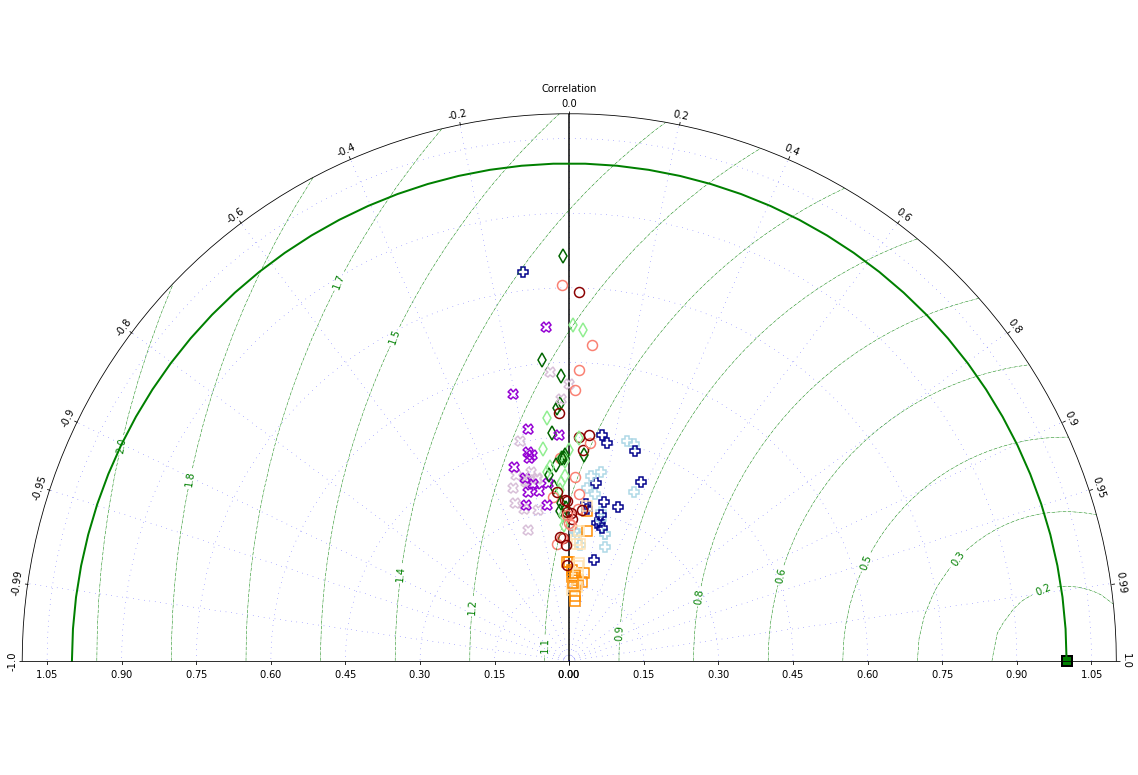

In [7]:
#TD_plot(mat4,mat3,map4,map3,mt4,mt3,ann4,ann3,s_w4,s_w3)
TD_plot(ann4,ann3,map4,map3,s_w4,s_w3,mt4,mt3,mat4,mat3)


plt.savefig('../../TD.pdf')
#plt.savefig('../../TD.png')

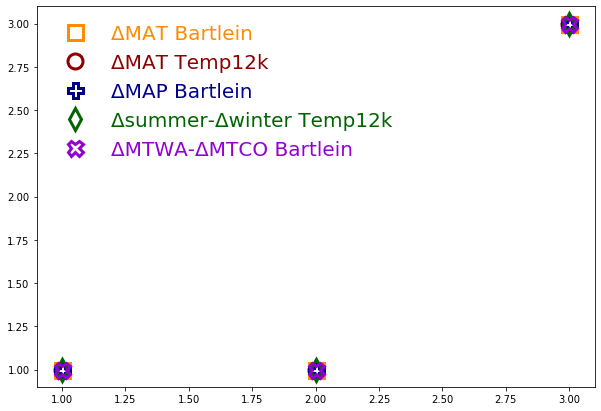

In [8]:
x=[1,2,3]
y=[1,1,3]
l0='%sMAT Bartlein'%chr(916)
l1='%sMAT Temp12k'%chr(916)
l2='%sMAP Bartlein'%chr(916)
l3='%ssummer-%swinter Temp12k'%(chr(916),chr(916))
l4='%sMTWA-%sMTCO Bartlein'%(chr(916),chr(916))
l5='%sSST Hessler'%chr(916)
plt.figure(figsize=(10,7))

plt.plot(x,y,marker='s', color='darkorange',fillstyle='none',mew=3, ms=15, linestyle='None',label=l0)
plt.plot(x,y,marker='o', color='darkred',fillstyle='none',mew=3, ms=15, linestyle='None',label=l1)
plt.plot(x,y,marker='P', color='darkblue',fillstyle='none',mew=3, ms=15,linestyle='None', label=l2)
plt.plot(x,y,marker='d', color='darkgreen',fillstyle='none',mew=3, ms=15, linestyle='None',label=l3)
plt.plot(x,y,marker='X', color='darkviolet',fillstyle='none',mew=3, ms=15, linestyle='None',label=l4)



leg=plt.legend(edgecolor='None',facecolor='None',fontsize=20)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())




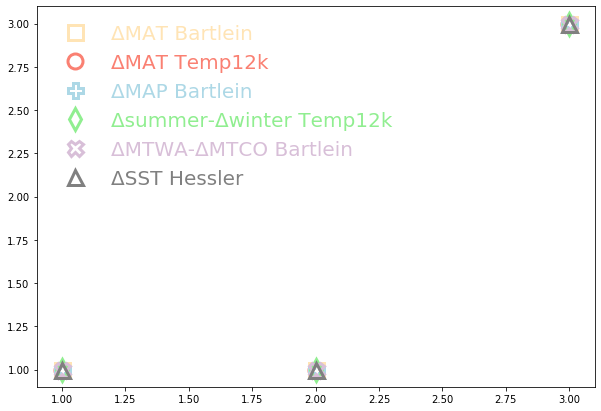

In [11]:
x=[1,2,3]
y=[1,1,3]
l0='%sMAT Bartlein'%chr(916)
l1='%sMAT Temp12k'%chr(916)
l2='%sMAP Bartlein'%chr(916)
l3='%ssummer-%swinter Temp12k'%(chr(916),chr(916))
l4='%sMTWA-%sMTCO Bartlein'%(chr(916),chr(916))
l5='%sSST Hessler'%chr(916)
plt.figure(figsize=(10,7))
plt.plot(x,y,marker='s', color='moccasin',fillstyle='none',mew=3, ms=15, linestyle='None',label=l0)
plt.plot(x,y,marker='o', color='salmon',fillstyle='none',mew=3, ms=15, linestyle='None',label=l1)
plt.plot(x,y,marker='P', color='lightblue',fillstyle='none',mew=3, ms=15,linestyle='None', label=l2)
plt.plot(x,y,marker='d', color='lightgreen',fillstyle='none',mew=3, ms=15, linestyle='None',label=l3)
plt.plot(x,y,marker='X', color='thistle',fillstyle='none',mew=3, ms=15, linestyle='None',label=l4)
plt.plot(x,y,marker='^', color='grey',fillstyle='none',mew=3, ms=15, linestyle='None',label=l5)


leg=plt.legend(edgecolor='None',facecolor='None',fontsize=20)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())

